<a href="https://colab.research.google.com/github/Gabriel-Brenner/DataPUCPR1/blob/main/Exercise_L13_Synthetic_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exercise #13 - Synthetic Data**
## **1. Requirements and first steps**
The first step is to install the synthetic data generation package. Of the various options presented in class (*Scikit-learn, SMOTE, SDV, Faker, DeepEcho among others*), the one chosen was **SDV (Synthetic Data Vault)** associated with the **imblearn** library.

- The installation of the library is done by the command:

In [ ]:
%%capture
pip install sdv imbalanced-learn

### *1.1 Required libraries*
- The main required libraries used were *Numpy, Pandas, Matplotlib* and also *sklearn* (for dataset) and *sdv* (for synthetic data)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from imblearn.over_sampling import SMOTE
from sdv.single_table import CTGANSynthesizer, GaussianCopulaSynthesizer
from sdv.metadata import SingleTableMetadata

### *1.2 Two used dsatasets*
- The chosen datasets for the simple explanation and application of synthetic data are the well known *Iris and Wine* datasets. The following functions were used to acess both.

In [ ]:
# load Iris dataset
def load_iris_dataset():
    data = load_iris()
    df = pd.DataFrame(data.data, columns=data.feature_names)
    df['target'] = data.target
    return df

# load Wine Quality dataset
def load_wine_dataset():
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
    df = pd.read_csv(url, delimiter=';')
    return df

# load datasets into variables
iris_df = load_iris_dataset()
wine_df = load_wine_dataset()

## **2. Choosing synthetic data generation approaches**
As the datasets had different characteristics (one more focused on classification and the other more on regression), five approaches were chosen to generate the data:
- Random Sampling with Replacement
- SMOTE (Synthetic Minority Over-sampling TEchnique)
- Data Augmentation by adding Gaussian noise
- CTGAN (Conditional Tabular GAN)
- Gaussian Copula

For each one, the following functions were created:

In [ ]:
# Random Sampling with Replacement
def random_sampling_with_replacement(df):
    synthetic_data = df.sample(n=len(df), replace=True, random_state=42)
    return synthetic_data

# SMOTE
def smote_synthetic_data(df, target_column):
    features = df.drop(target_column, axis=1)
    target = df[target_column]
    smote = SMOTE(random_state=42)
    X_res, y_res = smote.fit_resample(features, target)
    synthetic_data = pd.DataFrame(X_res, columns=features.columns)
    synthetic_data[target_column] = y_res
    return synthetic_data

# Data Augmentation by adding Gaussian noise
def gaussian_noise_synthetic_data(df, noise_level=0.1):
    synthetic_data = df.copy()
    noise = np.random.normal(0, noise_level, df.shape)
    synthetic_data += noise
    return synthetic_data

# CTGAN
def ctgan_synthetic_data(df):
    metadata = SingleTableMetadata()
    metadata.detect_from_dataframe(df)
    ctgan = CTGANSynthesizer(metadata)
    ctgan.fit(df)
    synthetic_data = ctgan.sample(len(df))
    return synthetic_data

# Gaussian Copula
def gaussian_copula_synthetic_data(df):
    metadata = SingleTableMetadata()
    metadata.detect_from_dataframe(df)
    gc = GaussianCopulaSynthesizer(metadata)
    gc.fit(df)
    synthetic_data = gc.sample(len(df))
    return synthetic_data

# **3. Execution of the chosen approaches**

The chosen approaches were performed for each dataset separately, with *Random Sampling, SMOTE, CTGAN and Gaussian copula* being used for the Iris dataset and *Random Sampling, Gaussian Noise, CTGAN and Gaussian copula* being used for the Wine dataset.

In [ ]:
# Apply to Iris dataset
iris_synthetic_random = random_sampling_with_replacement(iris_df)
iris_synthetic_smote = smote_synthetic_data(iris_df, 'target')
iris_synthetic_ctgan = ctgan_synthetic_data(iris_df)
iris_synthetic_gc = gaussian_copula_synthetic_data(iris_df)

# Apply to Wine dataset
wine_synthetic_random = random_sampling_with_replacement(wine_df)
wine_synthetic_gaussian_noise = gaussian_noise_synthetic_data(wine_df)
wine_synthetic_ctgan = ctgan_synthetic_data(wine_df)
wine_synthetic_gc = gaussian_copula_synthetic_data(wine_df)

/usr/local/lib/python3.10/dist-packages/sdv/single_table/base.py:86: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sdv/single_table/base.py:86: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sdv/single_table/base.py:86: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sdv/single_table/base.py:86: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(


### *3.1 Only plot configuration function to perform.*

In [ ]:
# PLOT configure function
def analyze_synthetic_data(original, synthetic, title):
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
    fig.suptitle(title, fontsize=16)

    for ax, feature in zip(axes.flatten(), original.columns):
        if feature != 'target':
            ax.hist(original[feature], bins=15, alpha=0.7, label='Original', color='blue', edgecolor='black')
            ax.hist(synthetic[feature], bins=15, alpha=0.7, label='Synthetic', color='orange', edgecolor='black')
            ax.set_title(feature)
            ax.legend(loc='upper right')

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

### *3.2 Iris dataset Analysis*

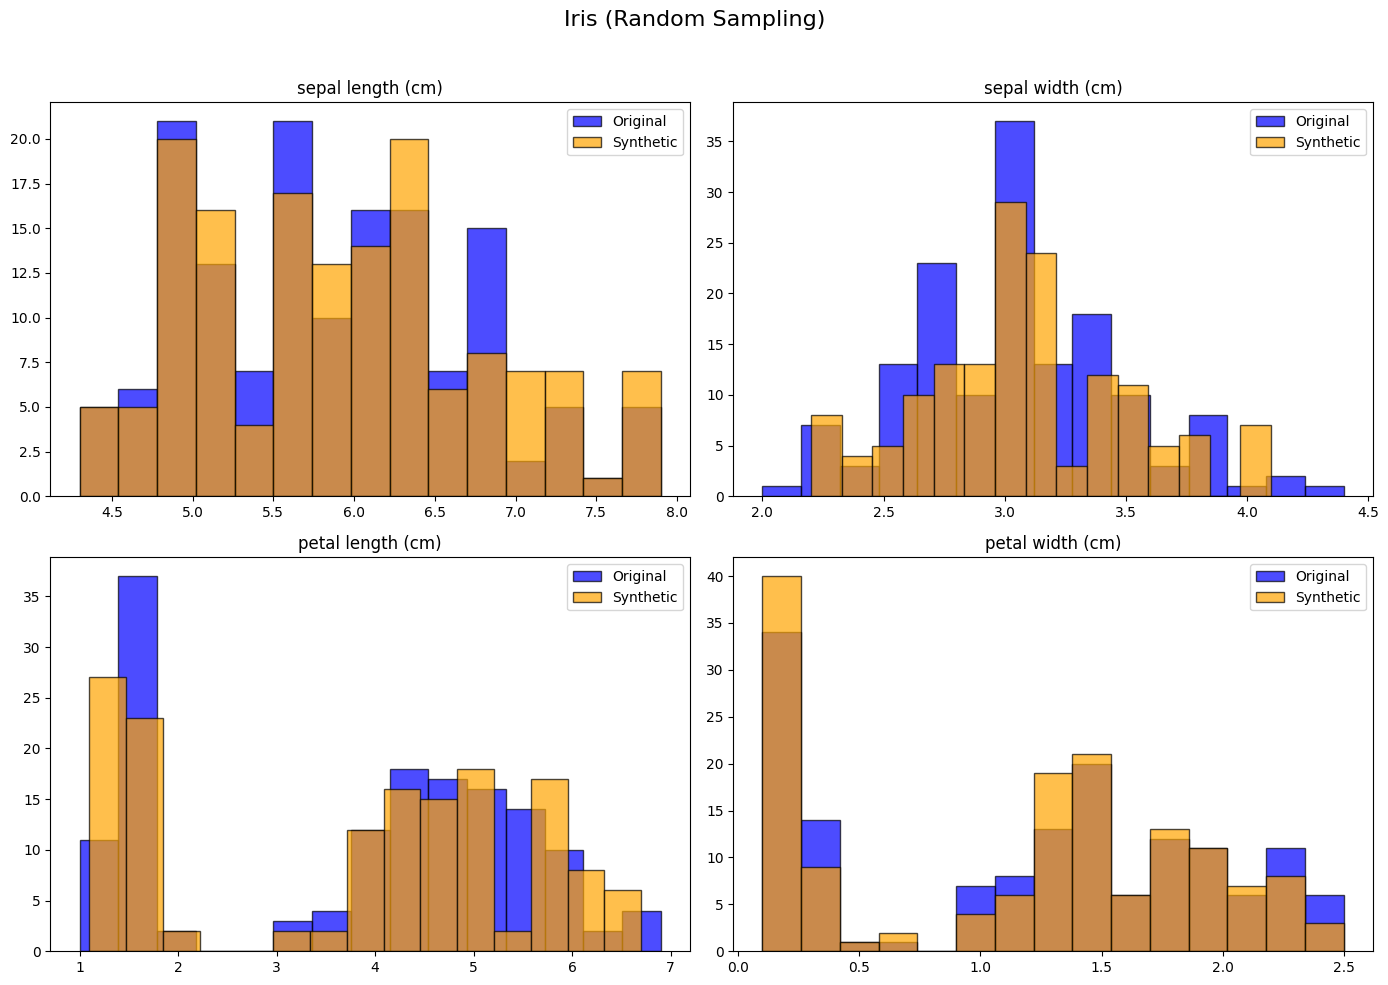

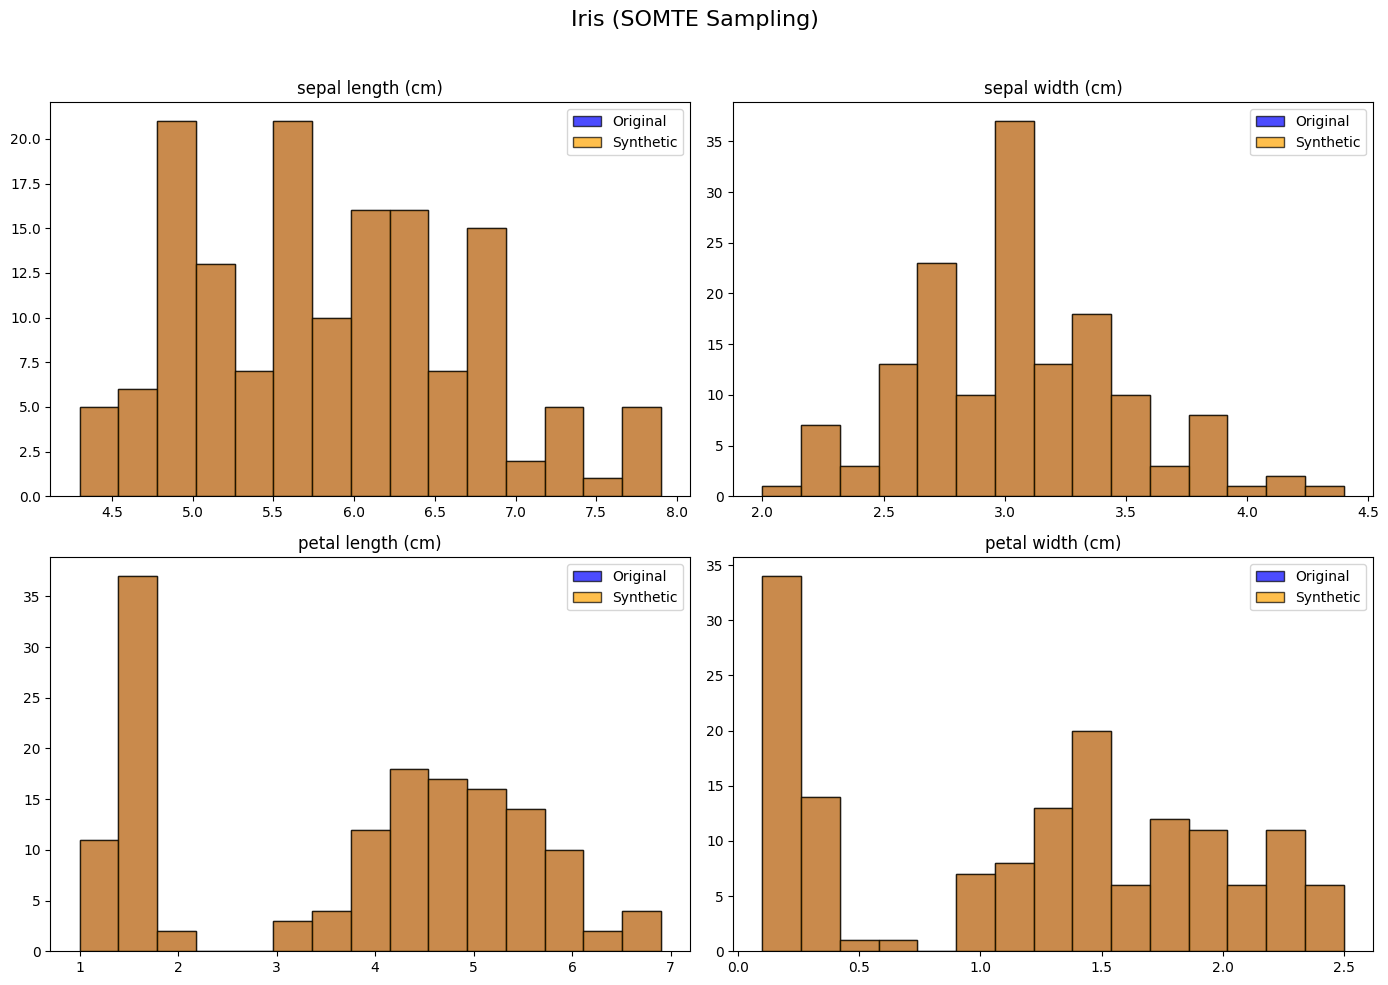

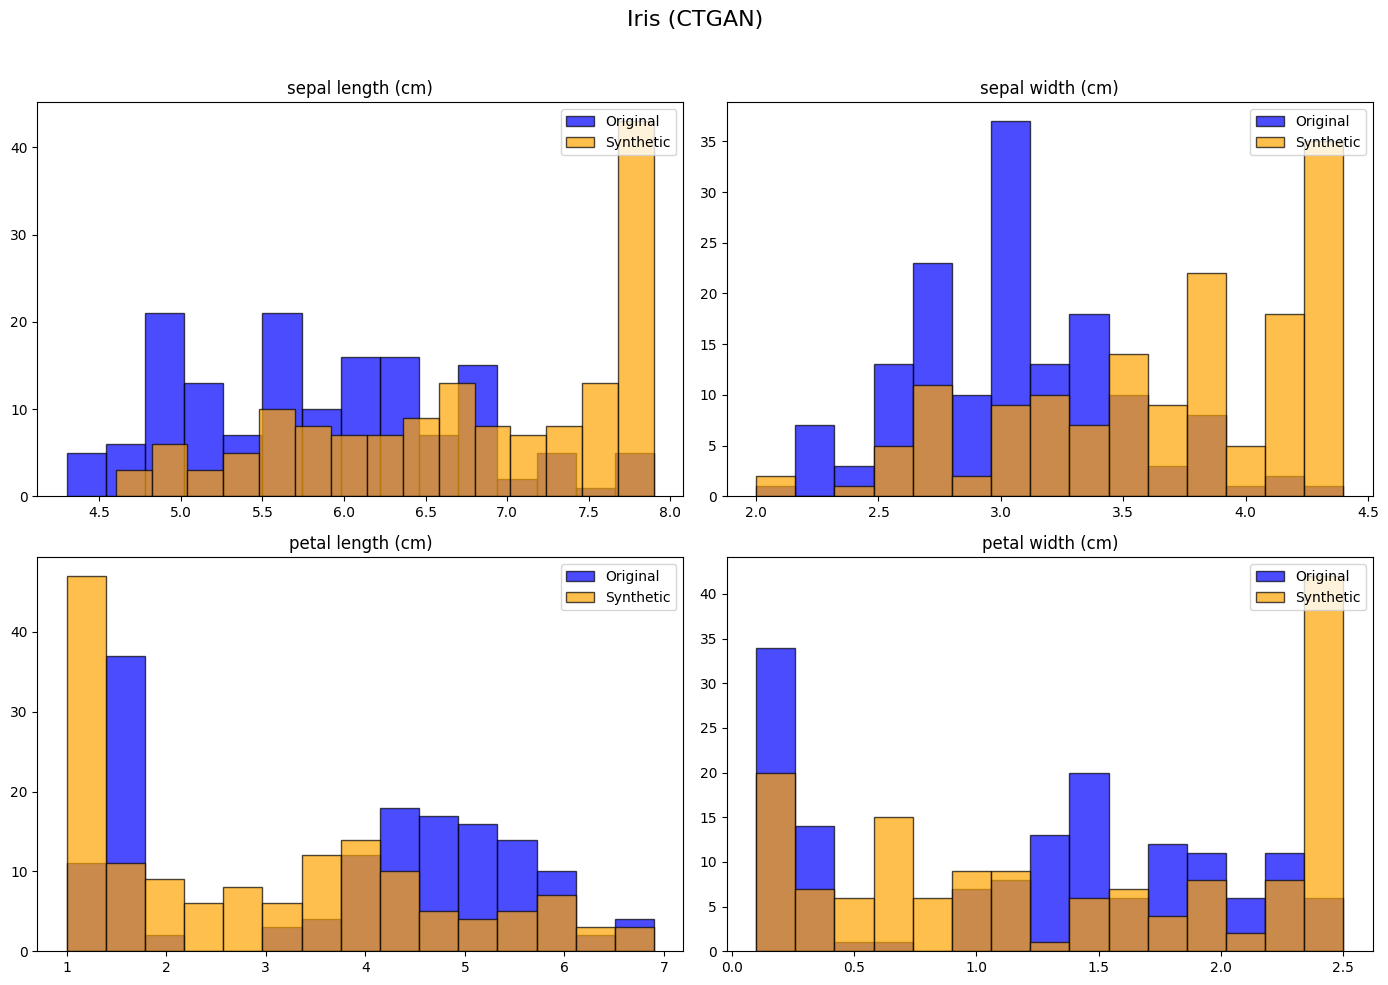

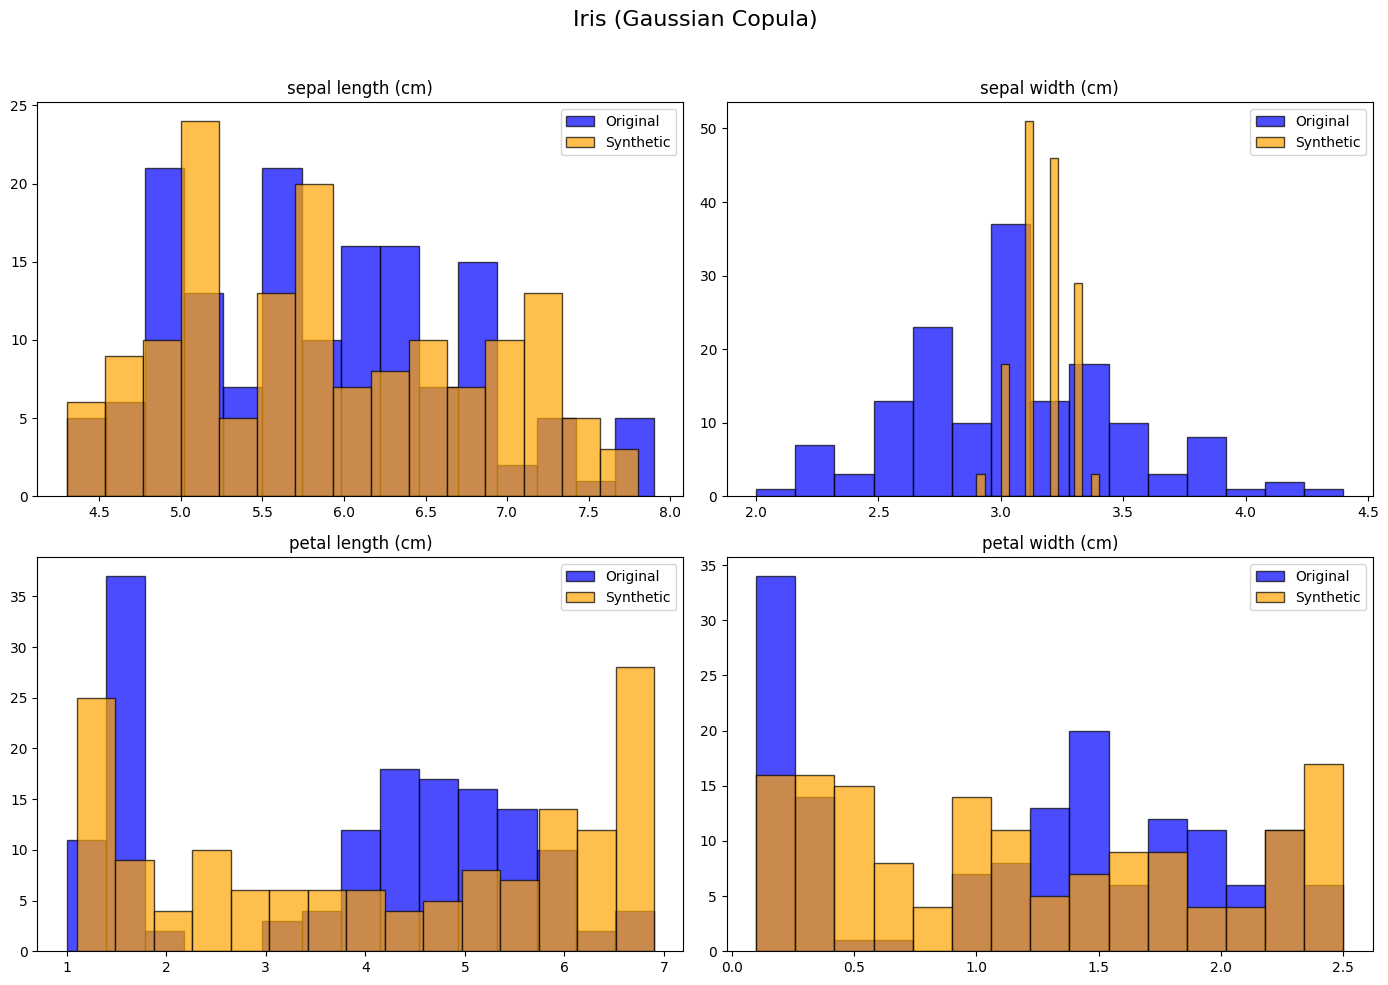

In [ ]:
# Analysis for Iris Dataset
analyze_synthetic_data(iris_df, iris_synthetic_random, 'Iris (Random Sampling)')
analyze_synthetic_data(iris_df, iris_synthetic_smote, 'Iris (SOMTE Sampling)')
analyze_synthetic_data(iris_df, iris_synthetic_ctgan, 'Iris (CTGAN)')
analyze_synthetic_data(iris_df, iris_synthetic_gc, 'Iris (Gaussian Copula)')

### *3.3 Wine dataset Analysis*

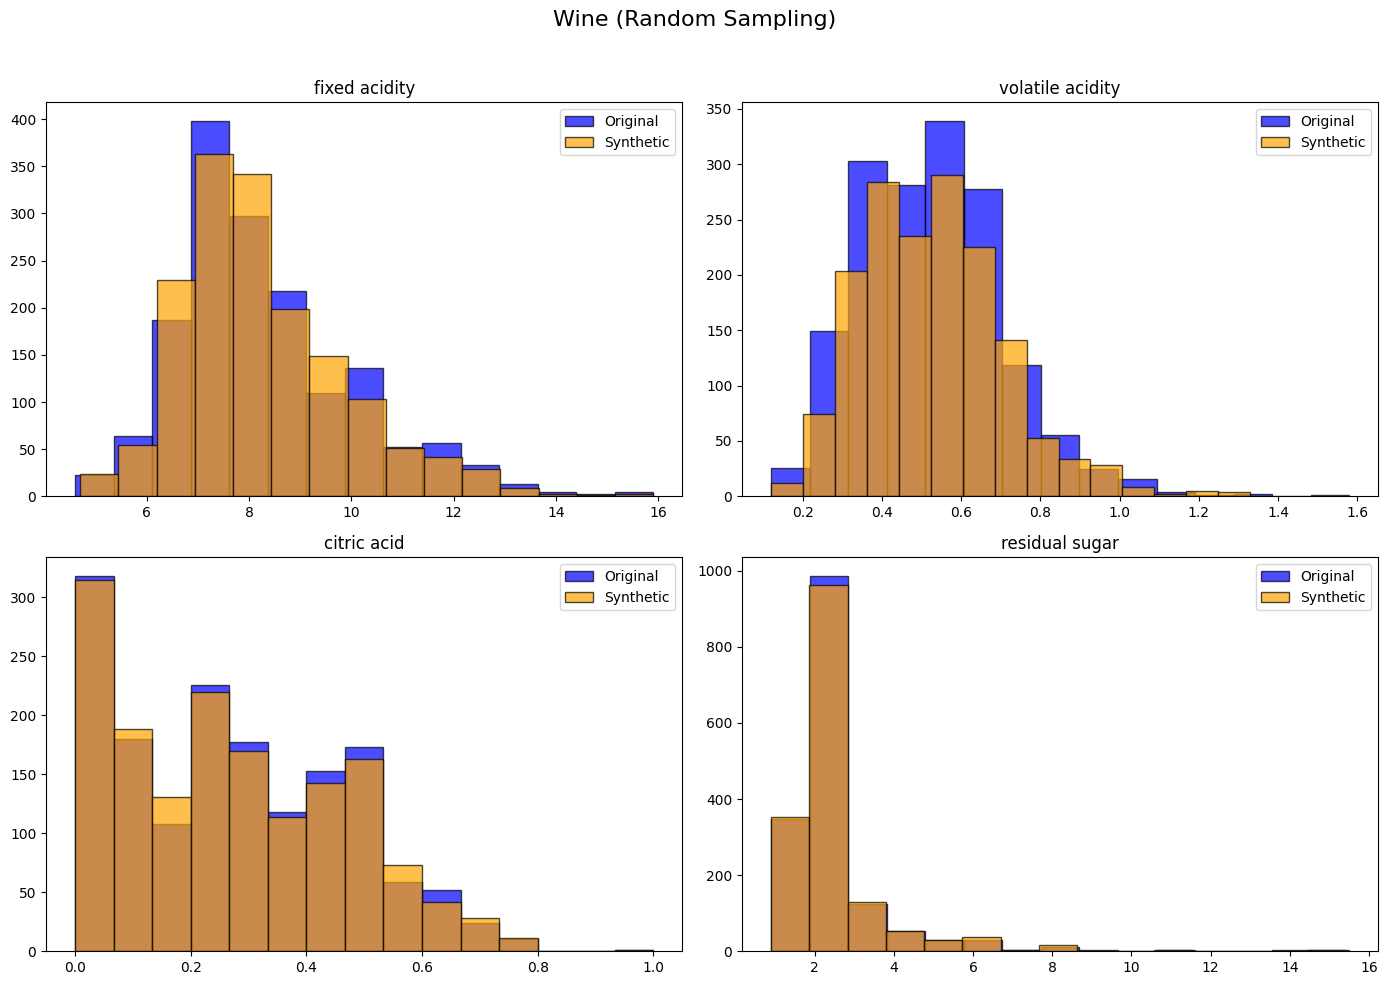

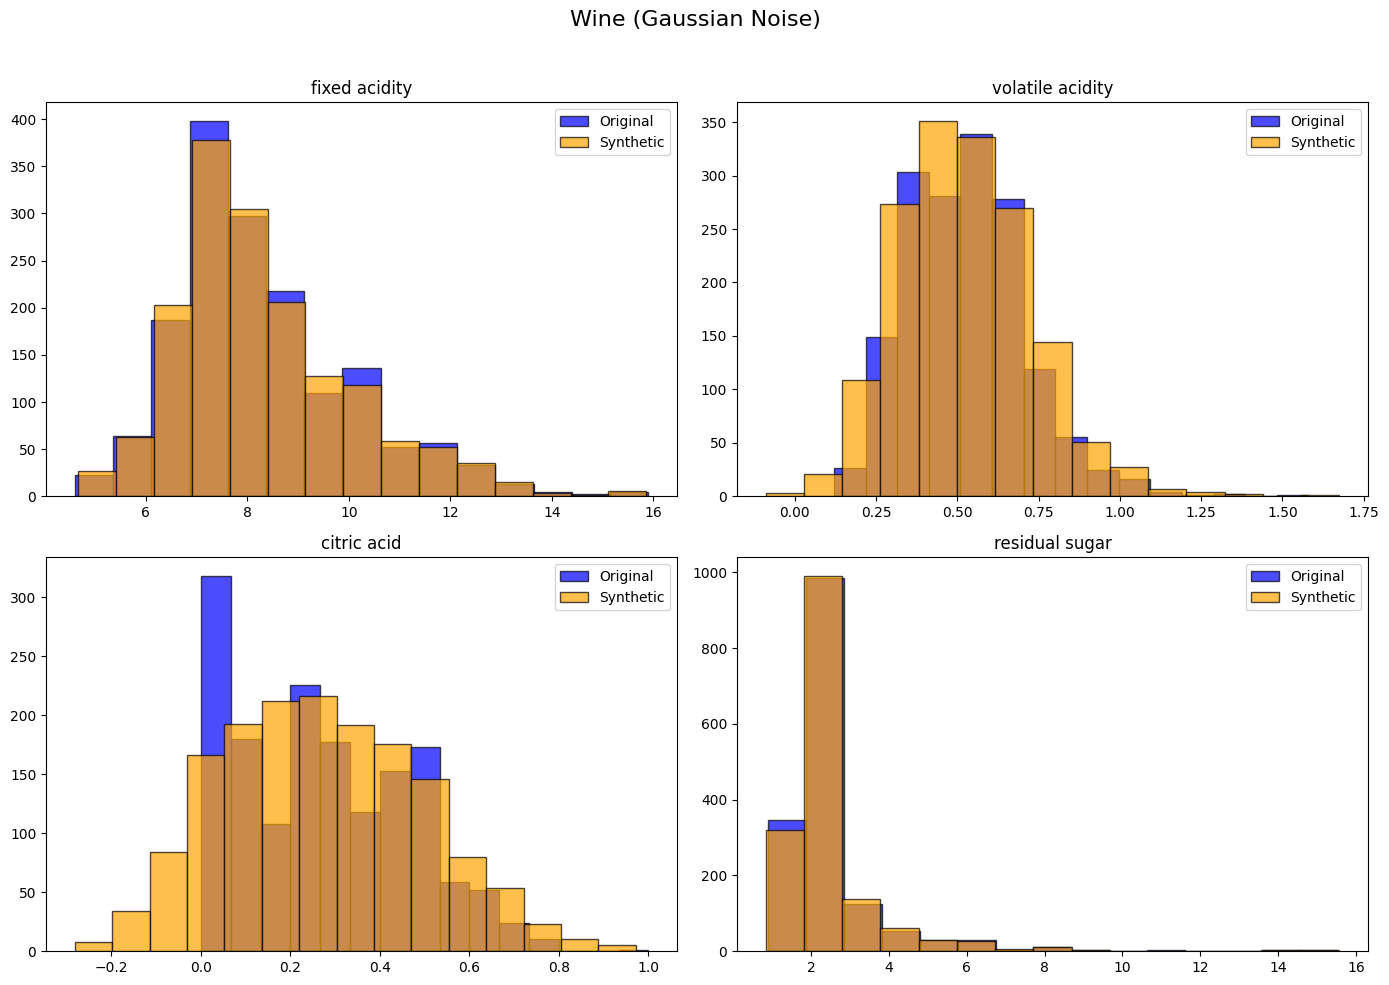

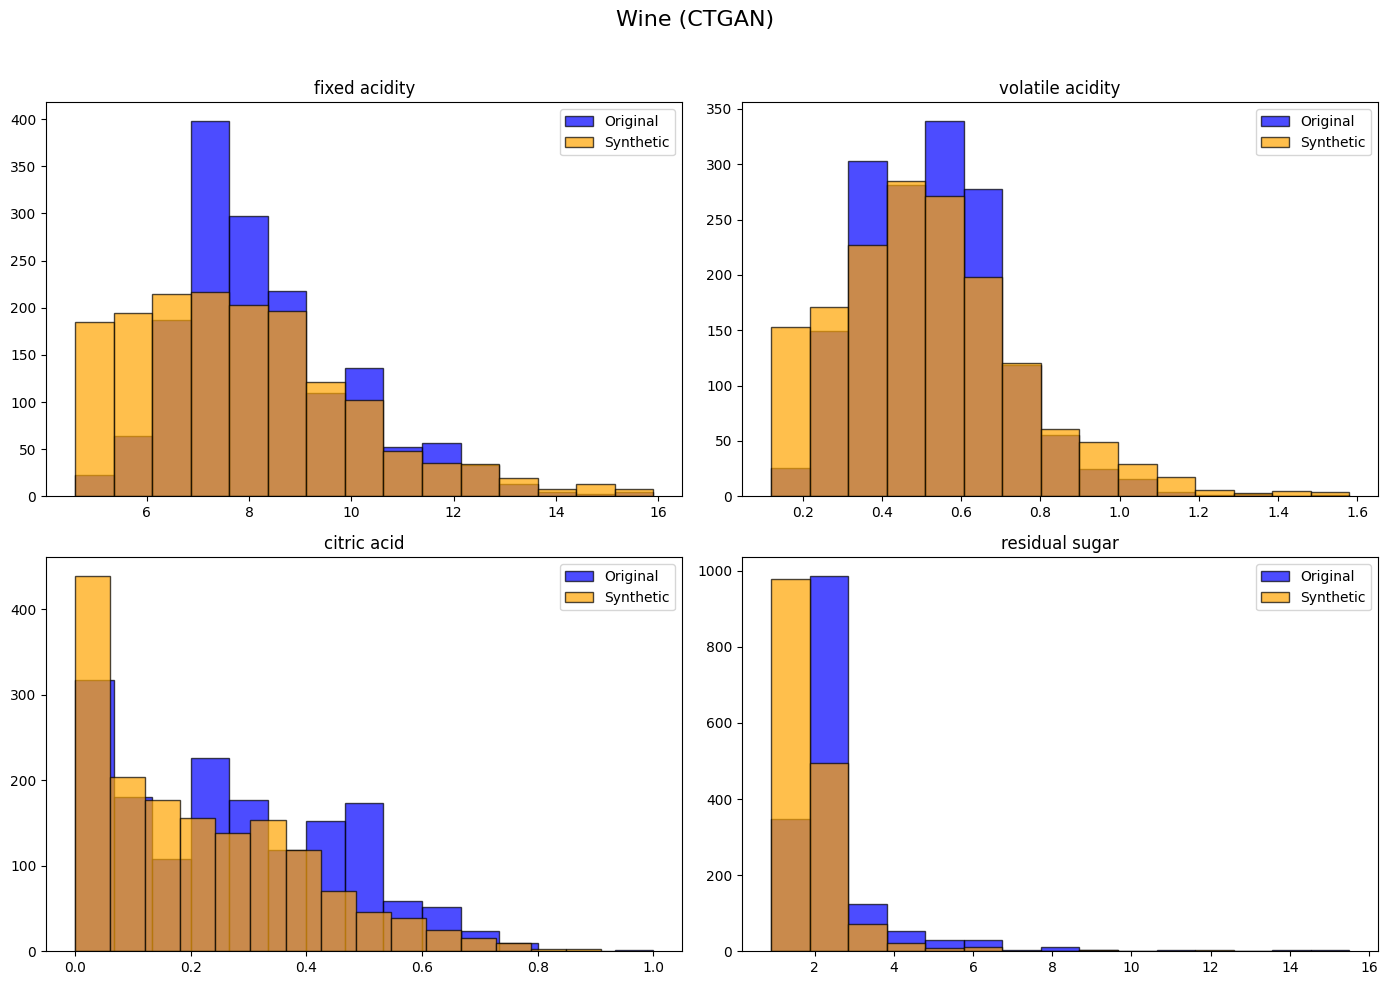

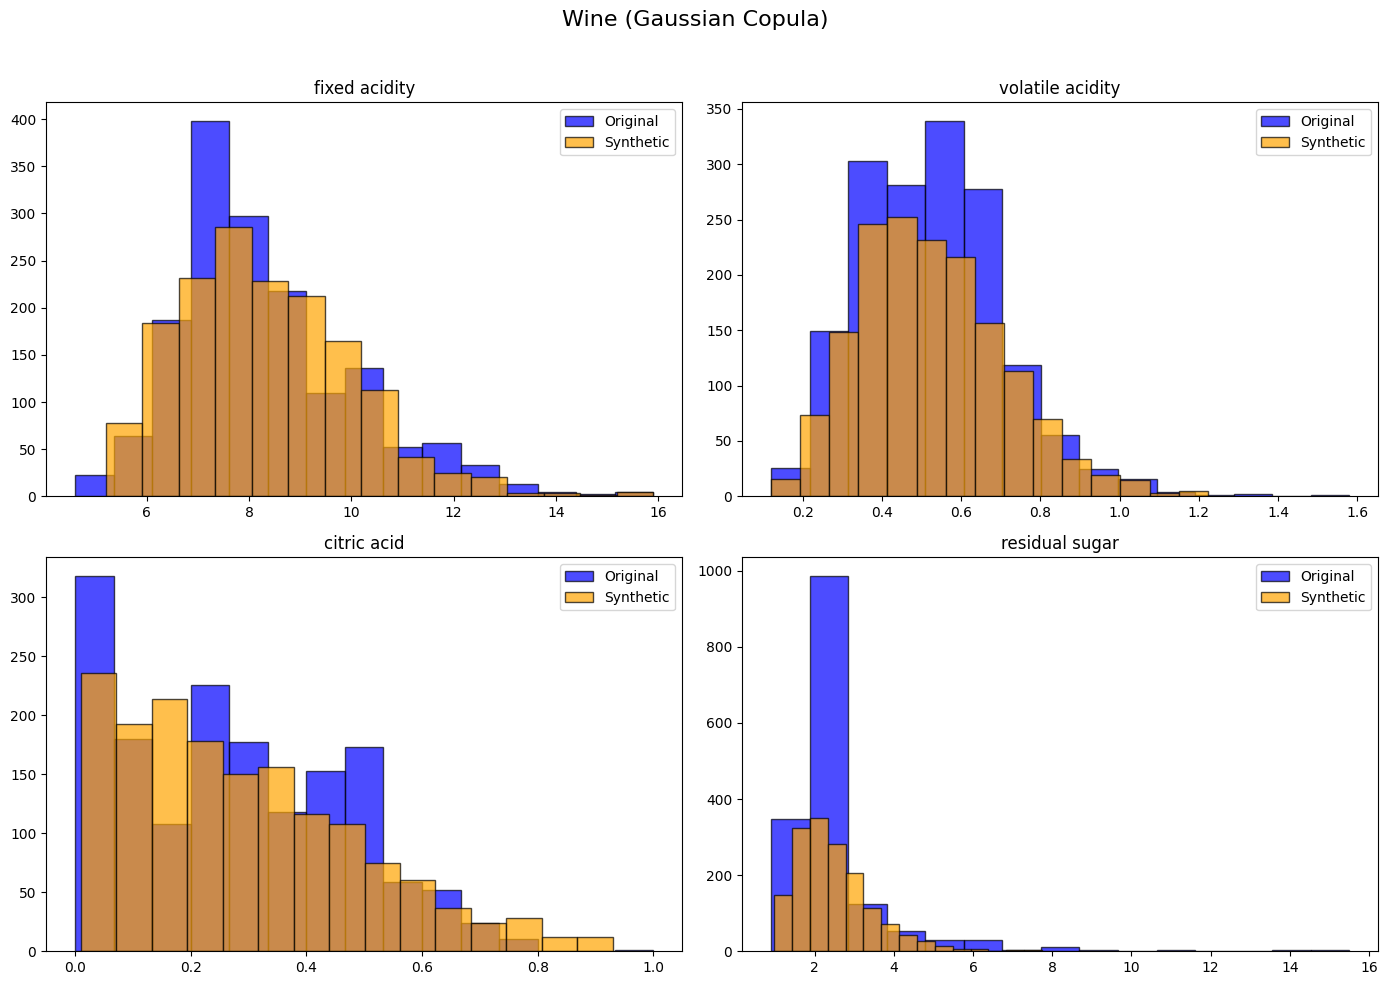

In [ ]:
# Analysis for Wine Dataset
analyze_synthetic_data(wine_df, wine_synthetic_random, 'Wine (Random Sampling)')
analyze_synthetic_data(wine_df, wine_synthetic_gaussian_noise, 'Wine (Gaussian Noise)')
analyze_synthetic_data(wine_df, wine_synthetic_ctgan, 'Wine (CTGAN)')
analyze_synthetic_data(wine_df, wine_synthetic_gc, 'Wine (Gaussian Copula)')

# LETRA B

In [1]:
!pip install diffusers transformers accelerate
!pip install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu113


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.4/309.4 kB 19.5 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylin

In [2]:
from diffusers import StableDiffusionPipeline
import torch

# Replace 'runwayml/stable-diffusion-v1-5' with the appropriate model name if needed
model_id = "runwayml/stable-diffusion-v1-5"

# Load the Stable Diffusion pipeline
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to("cuda")


The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/diffusers/models/transformers/transformer_2d.py:34: FutureWarning: `Transformer2DModelOutput` is deprecated and will be removed in version 1.0.0. Importing `Transformer2DModelOutput` from `diffusers.models.transformer_2d` is deprecated and this will be removed in a future version. Please use `from diffusers.models.modeling_outputs import Transformer2DModelOutput`, instead.
  deprecate("Transformer2DModelOutput", "1.0.0", deprecation_message)
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.w

model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

safety_checker/config.json:   0%|          | 0.00/4.72k [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


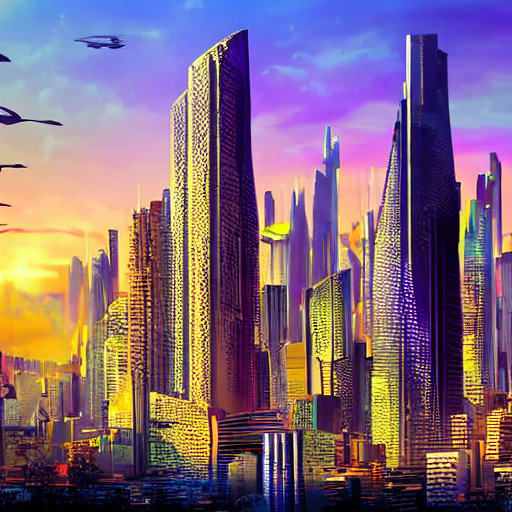

In [3]:
prompt = "A futuristic cityscape at sunset"
num_images = 1

# Generate image(s)
for _ in range(num_images):
    image = pipe(prompt).images[0]
    display(image)
